In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [2]:
from numpy.random import seed
seed(1)

from tensorflow import random
random.set_seed(2)

In [3]:
# load csv into dataframe
df = pd.read_csv(
    Path('../data/stocks_history.csv'),
    index_col='Unnamed: 0',
    infer_datetime_format=True,
    parse_dates=True
)
df.head()

,MSFT_open,MSFT_high,MSFT_low,MSFT_close,AAPL_open,AAPL_high,AAPL_low,AAPL_close,TSLA_open,TSLA_high,...,JNJ_low,JNJ_close,REGN_open,REGN_high,REGN_low,REGN_close,GILD_open,GILD_high,GILD_low,GILD_close
2010-06-29,24.13,24.20,23.110,23.31,264.1205,264.39,254.30,256.17,19.00,25.0000,...,58.680,59.24,23.67,23.95,22.86,22.98,35.40,35.61,34.740,34.97
2010-06-30,23.30,23.68,22.950,23.01,256.7100,257.97,250.01,251.53,25.79,30.4192,...,58.940,59.06,23.05,23.47,22.32,22.32,34.83,35.13,34.260,34.28
2010-07-01,23.09,23.32,22.730,23.16,254.3000,254.80,243.22,248.48,25.00,25.9200,...,58.650,59.07,22.31,22.37,20.45,20.79,34.24,34.27,33.300,34.14
2010-07-02,23.36,23.48,23.050,23.27,250.4900,250.93,243.20,246.94,23.00,23.1000,...,58.850,59.08,21.06,21.88,20.75,21.61,34.38,35.16,34.180,34.87
2010-07-06,23.70,24.09,23.584,23.82,251.0000,252.80,246.16,248.63,20.00,20.0000,...,58.669,59.08,22.03,22.03,21.16,21.36,35.11,35.42,34.415,34.77


In [4]:
# drop all columns except closing prices
dropped_columns = [
    'MSFT_open',
    'MSFT_high',
    'MSFT_low',
    'AAPL_open',
    'AAPL_high',
    'AAPL_low',
    'TSLA_open',
    'TSLA_high',
    'TSLA_low',
    'JNJ_open',
    'JNJ_high',
    'JNJ_low',
    'REGN_open',
    'REGN_high',
    'REGN_low',
    'GILD_open',
    'GILD_high',
    'GILD_low'
]
df.drop(columns=dropped_columns, inplace=True)
df.head()

,MSFT_close,AAPL_close,TSLA_close,JNJ_close,REGN_close,GILD_close
2010-06-29,23.31,256.17,23.89,59.24,22.98,34.97
2010-06-30,23.01,251.53,23.83,59.06,22.32,34.28
2010-07-01,23.16,248.48,21.96,59.07,20.79,34.14
2010-07-02,23.27,246.94,19.20,59.08,21.61,34.87
2010-07-06,23.82,248.63,16.11,59.08,21.36,34.77


In [5]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

window size: 1
MSE:996.040905696922
RMSE:31.56011574276815
window size: 5
MSE:62.09841278993272
RMSE:7.880254614537066
window size: 10
MSE:185.19861034183674
RMSE:13.608769611608418
window size: 15
MSE:83.26284894732338
RMSE:9.1248478862567
window size: 20
MSE:81.40640940054581
RMSE:9.02255004976674
window size: 25
MSE:42.98006946115232
RMSE:6.555918658826719
window size: 30
MSE:15.465202529223173
RMSE:3.9325821706892756


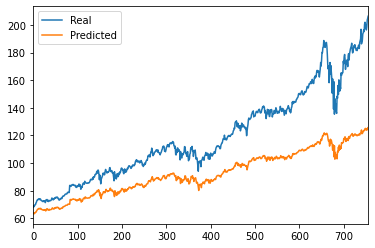

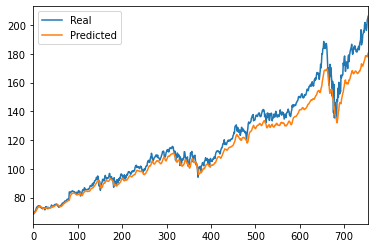

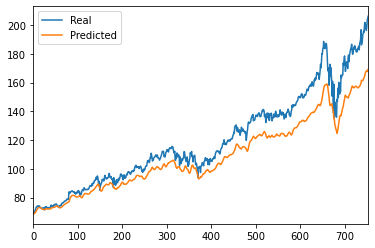

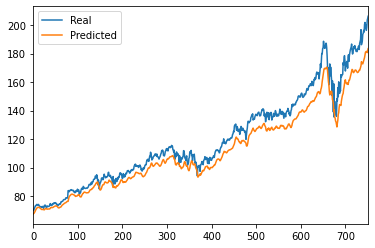

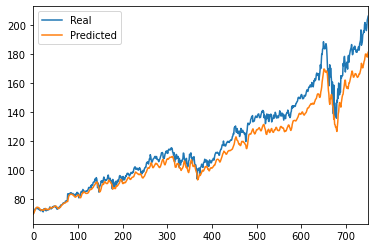

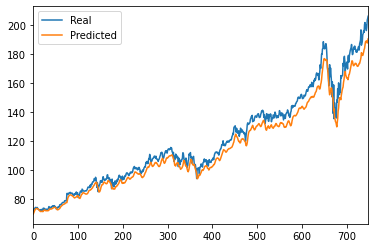

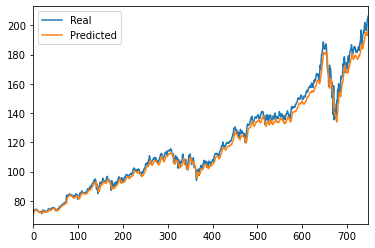

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

window_sizes = [1,5,10,15,20,25,30]


for stock in stocks_list:
    for window_size in window_sizes:

        feature_column = 0 # iterate over this to predict each stock in dataframe
        target_column = 0 # iterate over this to predict each stock in dataframe
        X, y = window_data(df, window_size, feature_column, target_column)

        # Use 70% of the data for training and the remainder for testing
        split = int(0.7 * len(X))
        X_train = X[: split - 1]
        X_test = X[split:]
        y_train = y[: split - 1]
        y_test = y[split:]

        # Use the MinMaxScaler to scale data between 0 and 1.
        scaler = MinMaxScaler()
        scaler.fit(X)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
        scaler.fit(y)
        y_train = scaler.transform(y_train)
        y_test = scaler.transform(y_test)

        # Reshape the features for the model
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

        # Define the LSTM RNN model.
        model = Sequential()

        number_units = window_size # should be equal to the size of the time window as selected above
        dropout_fraction = 0.25 # means that each epoch will randomly drop x% - iterate over

        # Layer 1
        model.add(LSTM(
            units=number_units,
        #     return_sequences=True,
            input_shape=(X_train.shape[1], 1))
            )
        model.add(Dropout(dropout_fraction))
        # Layer 2
        # model.add(LSTM(units=number_units, return_sequences=True))
        # model.add(Dropout(dropout_fraction))
        # Layer 3
        # model.add(LSTM(units=number_units))
        # model.add(Dropout(dropout_fraction))
        # Output layer
        model.add(Dense(1))

        # Compile the model
        model.compile(optimizer="adam", loss="mean_squared_error")

        # Train the model
        model.fit(X_train, y_train, epochs=30, shuffle=False, batch_size=10, verbose=0)

        # Evaluate the model
        model.evaluate(X_test, y_test, verbose=0)

        # Make some predictions
        predicted = model.predict(X_test)

        # Recover the original prices instead of the scaled version
        predicted_prices = scaler.inverse_transform(predicted)
        real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

        # Create a DataFrame of Real and Predicted values
        stocks = pd.DataFrame({
            "Real": real_prices.ravel(),
            "Predicted": predicted_prices.ravel()
        })

        # Plot the real vs predicted prices as a line chart
        print(f'window size: {window_size}')
        stocks.hvplot()

        print(f'MSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=True)}')
        print(f'RMSE:{mean_squared_error(stocks.iloc[:,0],stocks.iloc[:,1], squared=False)}')